In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing the dataset

In [6]:
advdf=pd.read_csv("advertising.csv")
advdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
advdf.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Explotory Data analyses**

In [7]:
advdf.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


analysing  the spread of age 

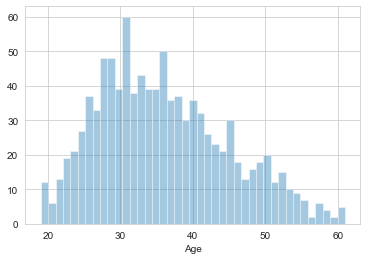

In [10]:
sns.set_style('whitegrid')
sns.distplot(advdf['Age'],bins=41,kde=False)

Analysing Area income vs Age

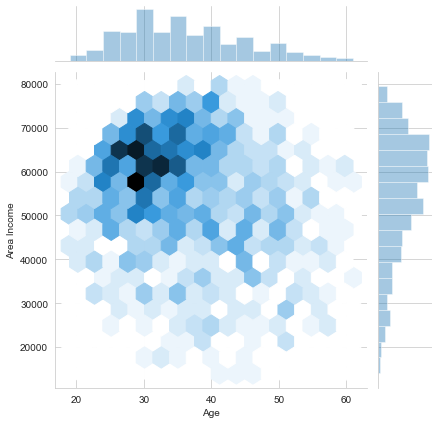

In [12]:
sns.jointplot(x='Age',y='Area Income',data=advdf,kind='hex')

Analysing Daily time spent vs Age

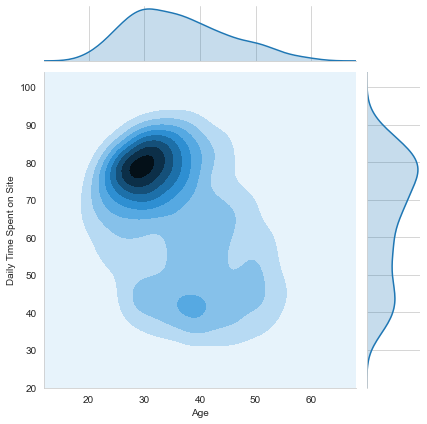

In [15]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=advdf,kind='kde')

Analysing daily time spent on site vs Daily internet usage

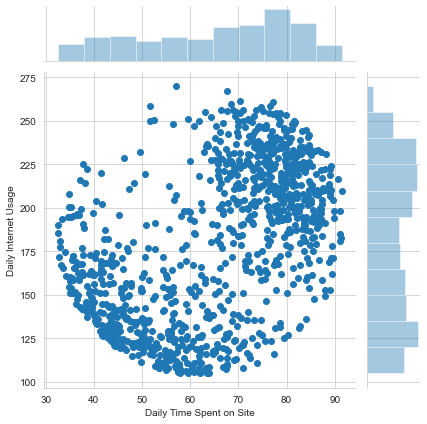

In [16]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=advdf,kind='scatter')

Analysing all numerical columns with each other with clicked on Ad as hue

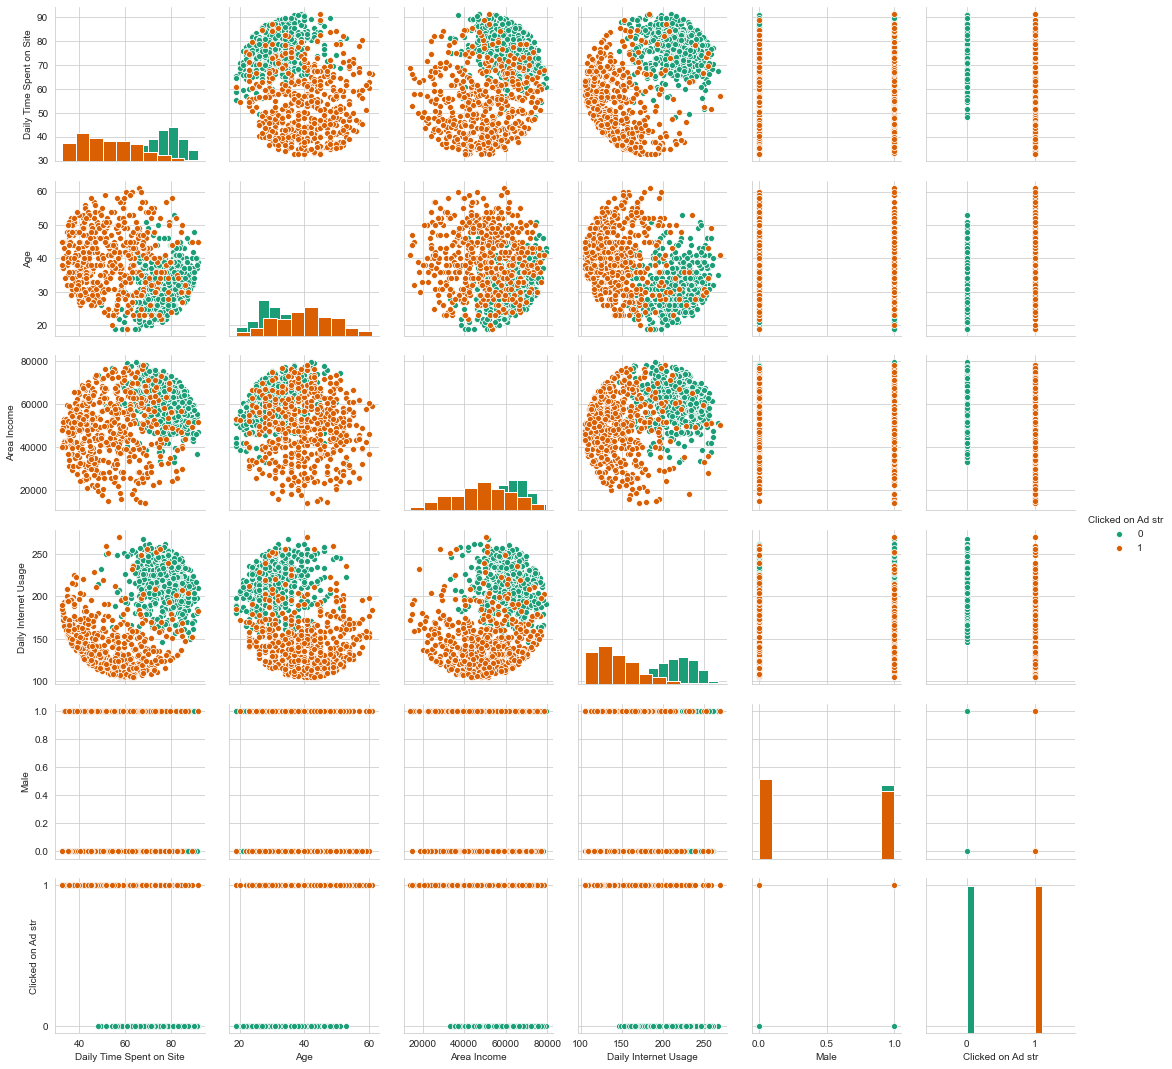

In [41]:
mygrid=sns.PairGrid(data=advdf[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad']],hue='Clicked on Ad',palette='Dark2')

mygrid.map_upper(sns.scatterplot)
mygrid.map_lower(sns.scatterplot)
mygrid.map_diag(plt.hist)
mygrid.add_legend()

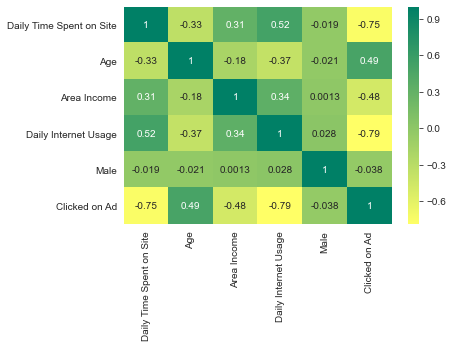

In [57]:
sns.heatmap(advdf.corr(),cmap='summer_r',annot=True)

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([data.ix[low:high, 'values'] for low, high in [(0, 70), (70, 85), (85, 90)]],
         bins=15,
         stacked=True,
         rwidth=1.0,
         label=['first70', 'next15', 'last5'])
ax.legend()

TypeError: distplot() got an unexpected keyword argument 'hue'

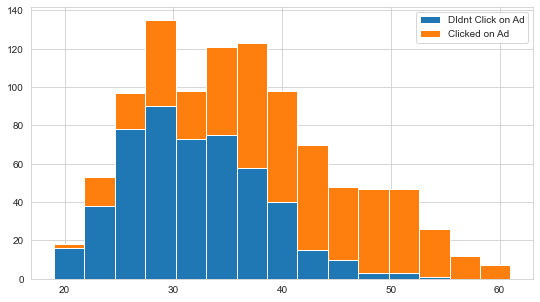

In [46]:
sns.set_style('whitegrid')
myhist=advdf[['Age','Clicked on Ad']]
myhist1=list(myhist[myhist['Clicked on Ad']==0]['Age'])
myhist2=list(myhist[myhist['Clicked on Ad']==1]['Age'])
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([myhist1,myhist2],
         bins=15,
         stacked=True,
         rwidth=1.0,
         label=['DIdnt Click on Ad', 'Clicked on Ad'])
ax.legend()